In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
2/891

0.002244668911335578

In [5]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
(687/891)

0.7710437710437711

In [8]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [9]:
age_mean = df['Age'].mean()
age_mean

29.69911764705882

In [10]:
df['Age'].fillna(age_mean,inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
em_mode = df['Embarked'].mode().max()
print(em_mode)

S


In [13]:
df['Embarked'].fillna(em_mode,inplace=True)

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
687/891

0.7710437710437711

In [16]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [17]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [18]:
print(type(df.dtypes))
df.dtypes

<class 'pandas.core.series.Series'>


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [19]:
df.drop(['Name','PassengerId','Cabin'],inplace=True,axis=1)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [20]:
cat_cols = [i for i in df.columns if df[i].dtypes=='object']
cat_cols

['Sex', 'Ticket', 'Embarked']

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
lb = LabelEncoder()
for i in cat_cols:
    df[i] = lb.fit_transform(df[i])


In [23]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Ticket        int32
Fare        float64
Embarked      int32
dtype: object

In [24]:
corr = df.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.039798
Ticket,-0.164549,0.319869,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.001729
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.001729,-0.224719,1.000000


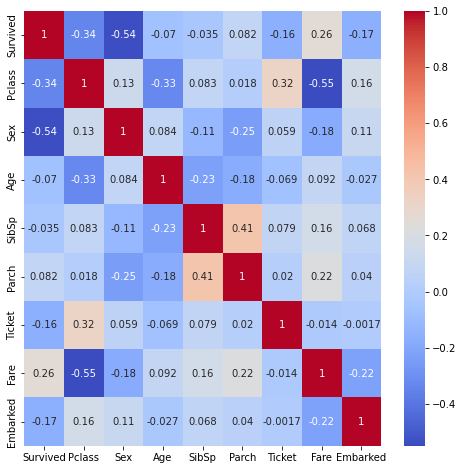

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [26]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [27]:
x = df.iloc[:,1:]
y = df['Survived']
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [28]:
x.head(3)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,22.0,1,0,523,7.2500,2
1,1,0,38.0,1,0,596,71.2833,0
2,3,0,26.0,0,0,669,7.9250,2


In [29]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [30]:
df['Ticket'].nunique()

681

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 8)
(223, 8)
(668,)
(223,)


In [33]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [34]:
def test_metrics(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Accuracy Score',accuracy_score(ytest,ypred))
    print('Confusion Matrix\n',cm)
    print('Cls Report\n',classification_report(ytest,ypred))
    
def tt_score(model):
    print('Training Score',model.score(x_train,y_train))
    print('Testing Score',model.score(x_test,y_test))

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
m1 = LogisticRegression(max_iter=1000)
m1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [37]:
tt_score(m1)
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

Training Score 0.8068862275449101
Testing Score 0.8026905829596412
[1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0
 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0
 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 1]


In [38]:
test_metrics(y_test,ypred_m1)

Accuracy Score 0.8026905829596412
Confusion Matrix
 [[118  22]
 [ 22  61]]
Cls Report
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       140
           1       0.73      0.73      0.73        83

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
m2 = KNeighborsClassifier(n_neighbors=21)
m2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [41]:
tt_score(m2)
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

Training Score 0.7125748502994012
Testing Score 0.7085201793721974
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0
 0]


In [42]:
test_metrics(y_test,ypred_m2)

Accuracy Score 0.7085201793721974
Confusion Matrix
 [[127  13]
 [ 52  31]]
Cls Report
               precision    recall  f1-score   support

           0       0.71      0.91      0.80       140
           1       0.70      0.37      0.49        83

    accuracy                           0.71       223
   macro avg       0.71      0.64      0.64       223
weighted avg       0.71      0.71      0.68       223



In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
m3 = RandomForestClassifier(n_estimators=70,criterion='entropy',max_depth=9)
m3.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=70)

In [45]:
tt_score(m3)
ypred_m3 = m3.predict(x_test)
print(ypred_m3)

Training Score 0.9416167664670658
Testing Score 0.8161434977578476
[1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0
 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0
 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0
 0]


In [46]:
test_metrics(y_test,ypred_m3)

Accuracy Score 0.8161434977578476
Confusion Matrix
 [[124  16]
 [ 25  58]]
Cls Report
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       140
           1       0.78      0.70      0.74        83

    accuracy                           0.82       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.82      0.81       223



In [47]:
from sklearn.svm import SVC

In [48]:
m4 = SVC(kernel='linear',C=1)
m4.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [49]:
tt_score(m4)
ypred_m4 = m4.predict(x_test)
print(ypred_m4)

Training Score 0.7979041916167665
Testing Score 0.7847533632286996
[1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0
 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0
 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0
 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 1]


In [50]:
test_metrics(y_test,ypred_m4)

Accuracy Score 0.7847533632286996
Confusion Matrix
 [[117  23]
 [ 25  58]]
Cls Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       140
           1       0.72      0.70      0.71        83

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
m5 = DecisionTreeClassifier(criterion='gini',max_depth=7)
m5.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [53]:
tt_score(m5)
ypred_m5 = m5.predict(x_test)
print(ypred_m5)

Training Score 0.9101796407185628
Testing Score 0.7847533632286996
[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0
 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0
 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0
 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0
 1]


In [54]:
test_metrics(y_test,ypred_m5)

Accuracy Score 0.7847533632286996
Confusion Matrix
 [[121  19]
 [ 29  54]]
Cls Report
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       140
           1       0.74      0.65      0.69        83

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223

